In [203]:
from pymongo import MongoClient
import pprint

import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import requests
from bs4 import BeautifulSoup

import json
import time
import copy

import os

from time import sleep
from selenium import webdriver

import script

import sys
import random
import scipy.stats as scs
import numpy as np

In [54]:
# written_review = ""
# ratings = []
# dates = []
# types = []
# review_text = []
# reviewer_links = []

In [249]:
# Mongo commands:
# driver = webdriver.Chrome()
client = MongoClient()
# client.list_database_names()
# client.drop_database()
# db = client.bearmountain
# db.PopolopenTorneLoop1.drop()
db.list_collection_names()
# for x in db.PopolopenTorneLoop.find({}, {'_id': False}):
#     print (x)

['PopolopenTorneLoop',
 'DoodletownBridlePathLoopTrail',
 'DunderbergBaldMountainAndTheTimpLoop',
 'BearMountainLoopTrail',
 'PerkinsMemorialTowerViaAppalachianTrail',
 'TimpTorneTrail']

In [ ]:
df = pd.DataFrame(list(db.BearMountainLoopTrail.find({})))

# db.collection_name or db[collection_name]
# db.drop_collection('a')

soup = BeautifulSoup(df.iloc[0,2], 'html.parser')

# getting trail title, description, difficulty, info
soup.find('h1', class_='xlate-none styles-module__name___1nEtW').text.rstrip()
soup.find('p', id="auto-overview").text.rstrip()
soup.find('span', class_="styles-module__diff___22Qtv styles-module__moderate___3w1it styles-module__selected___3fawg").text.rstrip()
soup.find('span', class_="styles-module__detailData___kQ-eK").text.rstrip()

soup_ratings = soup.find_all('span', class_="MuiRating-root default-module__rating___1k45X MuiRating-sizeLarge MuiRating-readOnly"
soup_dates = soup.find_all('span', class_="styles-module__dateTrailDetails___3qgZC xlate-none"
soup_types = soup.find_all('span', class_="styles-module__tag___2s-oD styles-module__activityTag___3-RdN"
soup_reviews
# d = {'ratings': [], 'dates': [], 'types': [], 'written_review': []}
# getting reviewer data for trail, appending to lists
for i, review in enumerate(soup.find_all('div', itemprop="review")):
    d = {'ratings': [], 'dates': [], 'types': [], 'written_review': []}
    d['ratings'] = soup_ratings[i]['aria-label'])
    d['dates'] = soup_dates[i].text.rstrip())
    d['types'] = soup_types[i].text.rstrip())

    written_review = sou[i].find('p', itemprop="reviewBody")

    if written_review == None:
        d['review_text'] = (None)

    else:
        d['review_text'] = (soup.find_all('div', class_="styles-module__container___3etfA")[i].find('p', itemprop="reviewBody").text.rstrip())
        
    client = MongoClient()
    db = client.bearmountain
    db.BearMountainLoopTrail.insert_one(d)

In [67]:
df = pd.DataFrame(list(db.TimpTorneTrail.find({})))

# db.collection_name or db[collection_name]
# db.drop_collection('a')

soup = BeautifulSoup(df.iloc[0,2], 'html.parser')
d = {'ratings': }
# getting trail title, description, difficulty, info
soup.find('h1', class_='xlate-none styles-module__name___1nEtW').text.rstrip()
soup.find('p', id="auto-overview").text.rstrip()
soup.find('span', class_="styles-module__diff___22Qtv styles-module__moderate___3w1it styles-module__selected___3fawg").text.rstrip()
soup.find('span', class_="styles-module__detailData___kQ-eK").text.rstrip()

# getting reviewer data for trail, appending to lists
for i, review in enumerate(soup.find_all('div', itemprop="review")):

    ratings.append(soup.find_all('span', class_="MuiRating-root default-module__rating___1k45X MuiRating-sizeLarge MuiRating-readOnly")[i]['aria-label'])
    dates.append(soup.find_all('span', class_="styles-module__dateTrailDetails___3qgZC xlate-none")[i].text.rstrip())
    types.append(soup.find_all('span', class_="styles-module__tag___2s-oD styles-module__activityTag___3-RdN")[i].text.rstrip())

    written_review = soup.find_all('div', class_="styles-module__container___3etfA")[i].find('p', itemprop="reviewBody")

    if written_review == None:
        review_text.append(None)

    else:
        review_text.append(soup.find_all('div', class_="styles-module__container___3etfA")[i].find('p', itemprop="reviewBody").text.rstrip())        

#         reviewer_links.append('alltrails.com' + soup.find_all('div', class_="styles-module__container___3etfA")[i].find('a', class_="styles-module__link___2i6Za styles-module__recording___3jQX3 xlate-none")['href'])

In [248]:
# import trail info to dataframe
test = db.DoodletownBridlePathLoopTrail
dff = pd.DataFrame(list(test.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))
dff = dff.iloc[1:,:]
dff

,ratings,dates,types,review_text
1,4.5 Stars,"February 11, 2021",Hiking,None
2,5 Stars,"February 6, 2021",Hiking,None
3,5 Stars,"January 23, 2021",Hiking,None
4,5 Stars,"January 17, 2021",Hiking,Nice walk from the ice rink to Perkins Tower y...
5,4 Stars,"January 9, 2021",Fee,Great trail! Still a little icy in spots and a...
6,5 Stars,"January 2, 2021",Great!,None
7,5 Stars,"December 30, 2020",Muddy,Some icy patching but a good challenging hike.
8,4 Stars,"December 26, 2020",Hiking,"Awesome workout, and quick and easy hike if no..."
9,5 Stars,"December 13, 2020",Hiking,None
10,5 Stars,"November 29, 2020",Bike touring,None


In [104]:
# close Selenium ChromeDriver
# driver.close()

# collecting data into dataframe
df = pd.DataFrame({'rating': ratings[:-1], 'date':dates, 'desc': types, 'reviews': review_text}).sort_values('rating') # to be added: , 'links': reviewer_links
total_reviews = df['rating'].count()

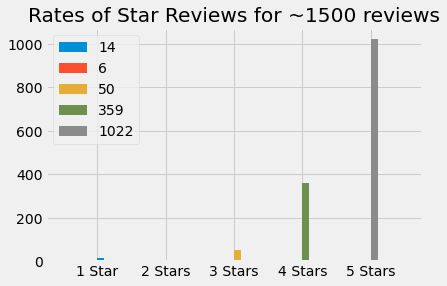

In [109]:
fig, ax = plt.subplots()
ax.hist(df[df['rating'] == '1 Star']['rating'], label=df[df['rating'] == '1 Star']['rating'].count())
ax.hist(df[df['rating'] == '2 Stars']['rating'], label=df[df['rating'] == '2 Stars']['rating'].count())
ax.hist(df[df['rating'] == '3 Stars']['rating'], label=df[df['rating'] == '3 Stars']['rating'].count())
ax.hist(df[df['rating'] == '4 Stars']['rating'], label=df[df['rating'] == '4 Stars']['rating'].count())
ax.hist(df[df['rating'] == '5 Stars']['rating'], label=df[df['rating'] == '5 Stars']['rating'].count())
ax.set_title(f'Rates of Star Reviews for ~{round(total_reviews,-2)} reviews')
_ = ax.legend()

In [125]:
df[df['rating'] == '1 Star']['reviews'].count(), df[df['rating'] == '1 Star']['rating'].count()
df_ = pd.DataFrame(
    {'stars': ['1 Star','2 Stars','3 Stars','4 Stars','5 Stars'], '% comments': [one, two, three, four, five]})

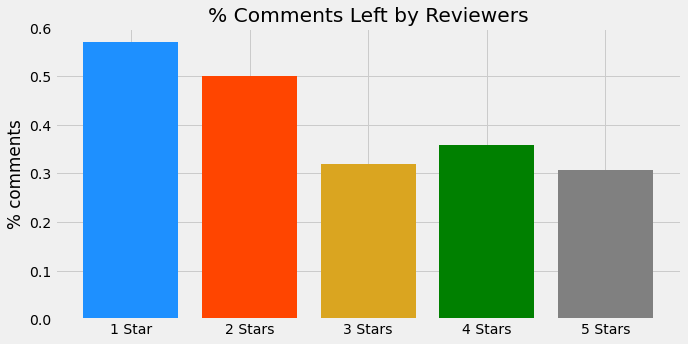

In [164]:
one = df[df['rating'] == '1 Star']['reviews'].count() / df[df['rating'] == '1 Star']['rating'].count()
two = df[df['rating'] == '2 Stars']['reviews'].count() / df[df['rating'] == '2 Stars']['rating'].count()
three = df[df['rating'] == '3 Stars']['reviews'].count() / df[df['rating'] == '3 Stars']['rating'].count()
four = df[df['rating'] == '4 Stars']['reviews'].count() / df[df['rating'] == '4 Stars']['rating'].count()
five = df[df['rating'] == '5 Stars']['reviews'].count() / df[df['rating'] == '5 Stars']['rating'].count()

x = np.arange(1,6)
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, df_['% comments'], color=('dodgerblue', 'orangered', 'goldenrod', 'green', 'grey'))
ax.set_xticks(x)
ax.set_xticklabels(df_['stars'])
ax.set_ylabel('% comments')
_ = ax.set_title(f'% Comments Left by Reviewers')
# _ = ax.legend()

## Comparing 4 and 5 stars

In [165]:
five = df[df['rating'] == '5 Stars']['reviews'].count() # num of written reviews left by five-star reviewers
four = df[df['rating'] == '4 Stars']['reviews'].count() # num of written reviews left by four-star reviewers
num_five = df[df['rating']=='5 Stars']['rating'].count() # num of five-star reviewers
num_four = df[df['rating']=='4 Stars']['rating'].count() # num of four-star reviewers

table = pd.DataFrame({'Written Reviews': [four, five], 'Total Reviewers': [num_four, num_five]}, index = ['4 Stars', '5 Stars']).T
table = table.style.set_properties(**{'text-align': 'center'})
table

,4 Stars,5 Stars
Written Reviews,129,313
Total Reviewers,359,1022


### Frequentist Approach

1. Question: Do 4 star and 5 star reviewers leave comments at different rates?

2. H0: Mu4 = Mu5 (4 and 5 star reviewers are equally likely to leave written reviews — P(R | 4) = P(R | 5))

3. Ha: Mu4 != Mu5 (4 and 5 star reviewers leave written reviews at different rates — P(R | 4) != P(R | 5))

4. Test Statistic: 4-Stars: 206 reviews and 5-Stars: 361 reviewers

5. Distribution: Normal

6. Alpha: 0.2

7. Data:

    4 Stars 47/206
    
    5 Stars 75/361

In [166]:
four_stars_distribution = ([0] * (359 - 129)) + ([1] * 129)
five_stars_distribution = (([0] * (1022 - 313)) + ([1] * 313))
# four_stars_prob_distribution = []
# five_stars_prob_distribution = []
# for i in four_stars_distribution:
#     four_stars_prob_distribution.append((mean_pop, 1 - mean_pop)[i])
# for i in five_stars_distribution:
#     five_stars_prob_distribution.append((mean_pop, 1 - mean_pop)[i])
print(f'Mean: \n   4 Stars {round(np.mean(four_stars_distribution),3)} \n   5 Stars {round(np.mean(five_stars_distribution),3)}\n')
print(f'Standard Deviation: \n   4 Stars {round(np.std(four_stars_distribution),3)} \n   5 Stars {round(np.std(five_stars_distribution),3)}')

Mean: 
   4 Stars 0.359 
   5 Stars 0.306

Standard Deviation: 
   4 Stars 0.48 
   5 Stars 0.461


In [182]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [179]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [180]:
# calculate welch test statistic (function in scipt.py)
test_statistic = welch_test_statistic(four_stars_distribution, five_stars_distribution)
test_statistic

1.8211686343420372

In [183]:
# calculate degrees of freedom
df = welch_satterhwaithe_df(four_stars_distribution, five_stars_distribution)

# set up distribution
students = scs.t(df)

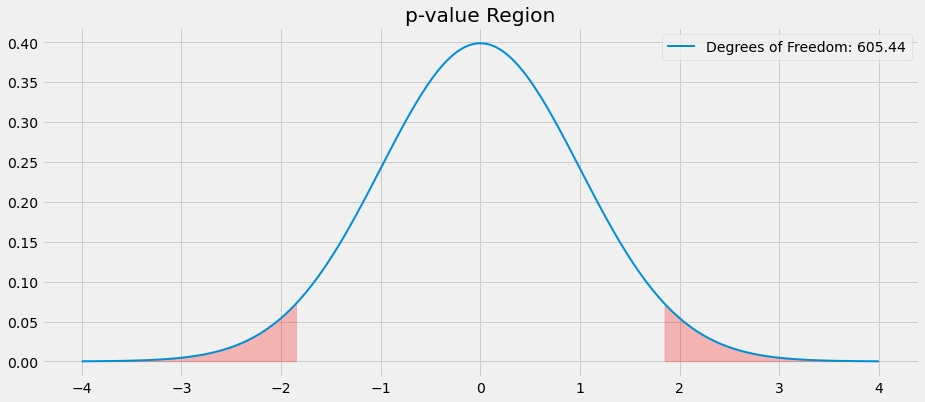

In [184]:
# Plotting distribution of Welch's Test Statistic Assuming H0

x = np.linspace(-4, 4, num=250)
fig, ax = plt.subplots(1, figsize=(14, 6))
students = scs.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degrees of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x <= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x >= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Region");

In [185]:
p_value_ = students.cdf(-test_statistic) + (1 - students.cdf(test_statistic))
print("p-value for average written reviews: {:2.2f}".format(p_value_))

p-value for average written reviews: 0.07


8. p-value: 0.07

9. Results: Reject H0.

10. In conclusion, the data show there is a difference in the average number of written reviews left by 4-star reviewers and 5-star reviewers.

In [201]:
d = {"ratings": []}
d['ratings'] = 'hello'

In [199]:
d['ratings'].append('goobye')

In [202]:
d

{'ratings': 'hello'}